# 9-2. 딥러닝

딥러닝

* 뇌의 뉴런과 유사한 머신러닝 알고리즘
* 심층 신경망(DNN, Deep Neural Network)
* 입력층 – 은닉층 – 출력층이 있음

[딥러닝의 학습 과정]

* 순전파: 예측값 계산
* 손실함수: 오차 측정
* 옵티마이저(최적화): 강사 하강법
* 역전파: 가중치 조절

언더피팅과 오버피팅

* train loss (영상의 파란색 곡선): 학습이 진행될수록 감소 -> train dataset에 맞게 모델이 학습되고 있음
* validation loss (영상의 주황색 곡선): 특정 시점 이후로 증가 -> 오버피팅

에폭(Epoch)

* 데이터 셋을 모두 학습한 상태 (루프 N회)

텐서플로(Tensorflow)

* 2015년 구글 브레인팀에 의해 공개된 머신러닝을 위한 무료 오픈 소스 라이브러리
* 고수준 API 지원 (keras)
* 자동 미분

Sequential 모델

* 레고블럭처럼 원하는 레이어만 불러들여서 쌓게 되면 하나의 딥러닝 모델을 만들 수 있다.

# 9-3. 이미지 분류

[리마인드] Sequential 모델

레고블럭처럼 원하는 레이어만 불러들여서 쌓게 되면 하나의 딥러닝 모델을 만들 수 있다.

Flatten Layer

keras에서 제공하는 함수인 Flatten을 통해 다차원 배열 공간을 1차원으로 평탄화 해준다.

예 : (영상 설명 참고) 28x28 크기의 데이터를 1차원으로 평탄화 -> 길이가 784인 벡터


Dense Layer

입력과 출력을 모두 연결해 준다. 입력 뉴런이 2개, 출력 뉴런이 4개라고 할때 총 연결선은 2x4개가 된다. 각 연결선은 가중치(연결 강도)를 포함한다.

activation(활성화 함수)

* softmax : 확률 값 출력, 가장 높은 확률 값을 가지는 클래스 선택
* ReLU : x가 0보다 작으면 0을 출력하고, x가 0보다 크면 x값을 출력한다.

optimizer(최적화 알고리즘)

* 손실함수(Loss Function)를 최소화 하면서 학습하는 방법
* optimizer 자세히 알아보기
* Loss Function 자세히 알아보기


## 1. mnist 데이터

In [1]:
# 라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# version
tf.__version__

'2.15.0'

In [3]:
# 데이터셋 불러오기
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# 데이터 크기
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# 데이터 확인
import numpy as np
np.set_printoptions(linewidth=120)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

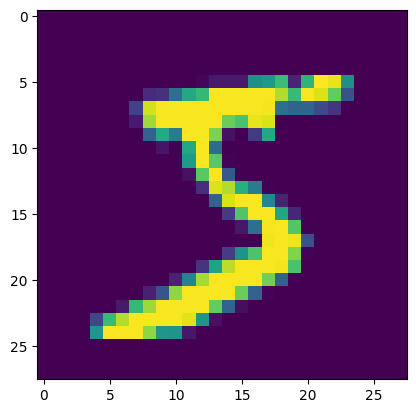

In [6]:
# 데이터 확인(이미지)
plt.imshow(X_train[0])

In [7]:
# label 확인
y_train[0]

5

In [8]:
# 모델
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(256, activation='relu'),
                    Dense(10, activation='softmax')
])

In [9]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# 학습
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 2.6368 - accuracy: 0.8890
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3319 - accuracy: 0.9296
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2683 - accuracy: 0.9378
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2524 - accuracy: 0.9420
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2329 - accuracy: 0.9468


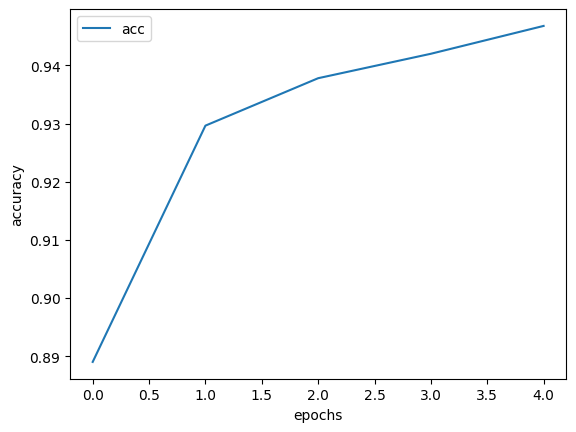

In [12]:
# 학습 정확도 (epoch에 따른 accuracy 변화)
plt.plot(history.history['accuracy'], label='acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

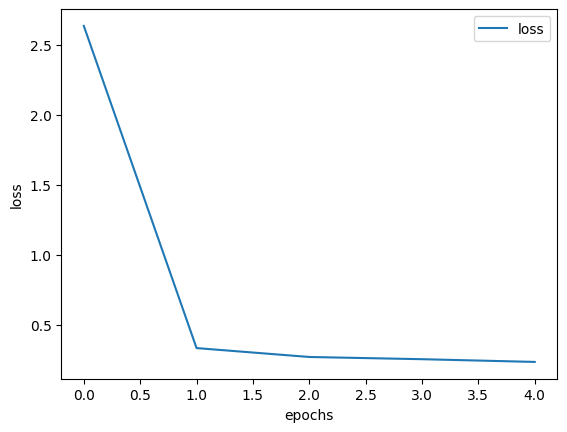

In [13]:
# loss
plt.plot(history.history['loss'], label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## 2. fashion-mnist 데이터

In [14]:
# 라이브러리 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 데이터 불러오기
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [16]:
# 정규화(0~1 사이)
X_train, X_test = X_train / 255.0, X_test / 255.0

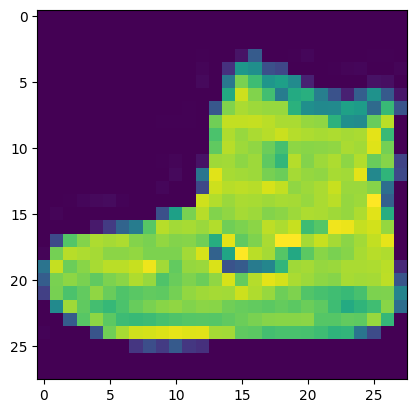

In [17]:
# 데이터 확인(이미지)
plt.imshow(X_train[0])

In [18]:
y_train[0]

9

In [19]:
# label 확인
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot",
]

print(classes[y_train[0]])

Ankle boot


T-shirt/top


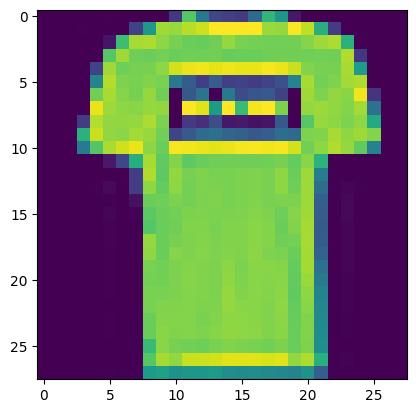

In [20]:
# 데이터 확인(이미지, 레이블)
print(classes[y_train[1]])
plt.imshow(X_train[1])

In [21]:
# 모델
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'),
                    Dropout(0.2),    # Dense 레이어에서 연결의 20% 생략 - 오버피팅 방지
                    Dense(10, activation='softmax')
])

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# 학습

# 데이터의 20%를 자동으로 validation data로 지정
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

# 특정 dataset을 validation data로 사용
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5327 - accuracy: 0.8111 - val_loss: 0.4387 - val_accuracy: 0.8397
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4020 - accuracy: 0.8551 - val_loss: 0.4148 - val_accuracy: 0.8535
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3688 - accuracy: 0.8650 - val_loss: 0.3842 - val_accuracy: 0.8601
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3491 - accuracy: 0.8721 - val_loss: 0.3663 - val_accuracy: 0.8657
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3333 - accuracy: 0.8767 - val_loss: 0.3538 - val_accuracy: 0.8714
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3203 - accuracy: 0.8826 - val_loss: 0.3453 - val_accuracy: 0.8794
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3103 - accuracy: 0.8847 - val_loss: 0.3498 - val_accuracy:

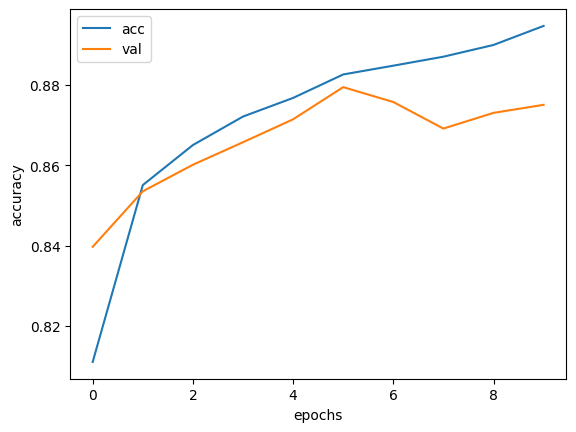

In [23]:
# 학습 정확도
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

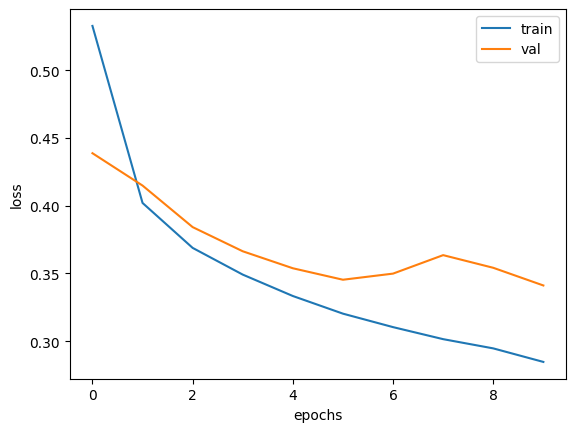

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [25]:
# 예측
pred = model.predict(X_test)
pred[1]

313/313 [==============================] - 1s 2ms/step


array([2.1543435e-06, 2.1213748e-13, 9.9700004e-01, 1.6706477e-12, 6.2562199e-04, 1.6813564e-16, 2.3721366e-03,
       1.5312266e-22, 1.0076692e-12, 2.3654146e-20], dtype=float32)

In [26]:
np.argmax(pred[1])

2

In [27]:
# 예측한 label
classes[np.argmax(pred[1])]

'Pullover'

In [28]:
# 실제 label
classes[y_test[1]]

'Pullover'

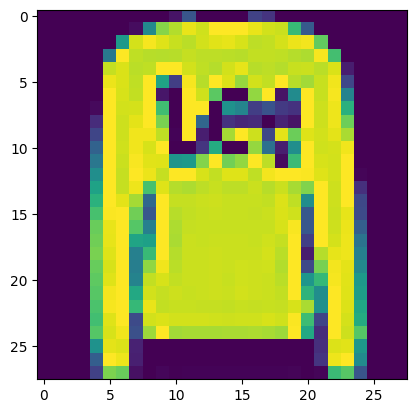

In [29]:
# 이미지 확인
plt.imshow(X_test[1])

# 9-4. CNN을 활용한 이미지 분류

CNN(합성곱 신경망 )

* 시각적 영상을 분석하는 데 사용되는 다층의 피드-포워드적인 인공신경망의 한 종류
* 합성곱층(Convolution layer)과 풀링층(Pooling layer)으로 구성

(1) 합성곱 레이어

* 입력 데이터와 커널(필터) 사이의 연산을 통해 데이터가 새롭게 구성된다.

(2) 풀링 레이어

* 합성곱 레이어를 통해서 나온 feature에 맥스 풀링 연산을 적용하면 풀링 영역에서 가장 큰 값을 찾아낸다.


(3) 이미지의 특징(feature)을 추출한 피처 맵이 나온다.

(4) Flatten 레이어

* Flatten 레이어를 통해 다차원 배열 공간을 1차원으로 펼쳐준다.

(5) Dense 레이어

* Dense 레이어를 통해 이미지를 분류한다.


In [30]:
# 라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# 데이터 불러오기
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# shape 변경
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# 정규화(0~1 사이)
X_train, X_test = X_train / 255.0, X_test / 255.0

# 모델
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)         

In [32]:
# 학습
# (CPU 환경에서 10분 이상 소요될 수 있습니다. 시간이 너무 오래 걸리는 경우 epoch 수를 줄여보세요)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.5977 - accuracy: 0.7822 - val_loss: 0.4921 - val_accuracy: 0.8283
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.4109 - accuracy: 0.8502 - val_loss: 0.4014 - val_accuracy: 0.8536
Epoch 3/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3499 - accuracy: 0.8723 - val_loss: 0.3541 - val_accuracy: 0.8736
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3142 - accuracy: 0.8847 - val_loss: 0.3430 - val_accuracy: 0.8735
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2857 - accuracy: 0.8939 - val_loss: 0.3228 - val_accuracy: 0.8854
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2637 - accuracy: 0.9019 - val_loss: 0.3275 - val_accuracy: 0.8830
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2472 - accuracy: 0.9074 - val_loss: 0.3085 -

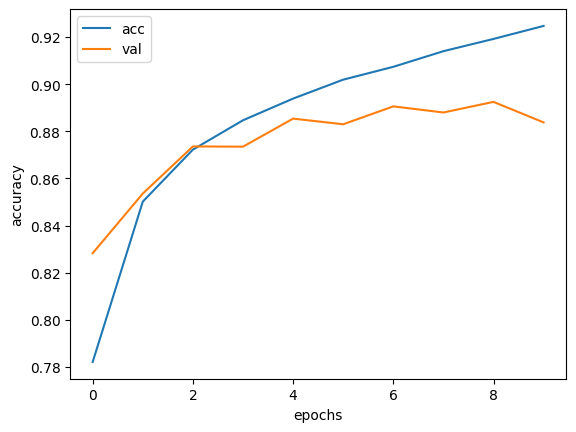

In [33]:
# 학습 정확도
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

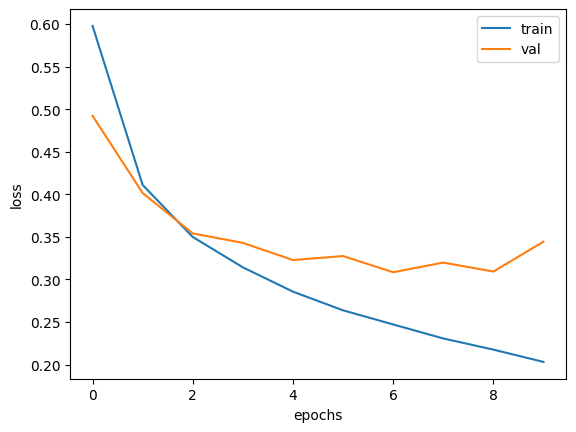

In [34]:
# loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()